In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
import pickle 
from sklearn.svm import SVR



In [2]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
y_test_data=pd.read_csv('sample_submission.csv')

In [3]:
pd.set_option('display.max_columns', None)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

In [5]:
print(train_data.isnull().sum().to_string())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
train_data.drop(['Id'],axis=1,inplace=True)
test_data.drop(['Id'],axis=1,inplace=True)
y_test_data.drop(['Id'],axis=1,inplace=True)

In [7]:
features_nan = []
test_features_nan = []

for feature in train_data.columns:
    if train_data[feature].isnull().sum() > 1 and train_data[feature].dtypes == 'O':
        features_nan.append(feature)
        
for feature in test_data.columns:
    if test_data[feature].isnull().sum() > 1 and test_data[feature].dtypes == 'O':
        test_features_nan.append(feature)


In [8]:
# print(test_data.isnull().sum().to_string())
len(test_features_nan)

18

In [9]:
## missing Categorical  
def replace_cat_feature(dataframe,features_nan):
    data=dataframe.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

train_data=replace_cat_feature(train_data,features_nan)

test_data=replace_cat_feature(test_data,test_features_nan)

print(train_data[features_nan].isnull().sum())



Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64


In [10]:
# missing Numerical values 

numerical_with_nan = []
numerical_with_nan_test = []

for feature in train_data.columns:
    if train_data[feature].isnull().sum() > 1 and train_data[feature].dtypes != 'O':
        numerical_with_nan_test.append(feature)


numerical_with_nan = []

for feature in test_data.columns:
    if test_data[feature].isnull().sum() > 1 and test_data[feature].dtypes != 'O':
        numerical_with_nan.append(feature)


In [11]:
for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(train_data[feature].isnull().mean(),4)))

for feature in numerical_with_nan_test:
    print("{}: {}% missing value".format(feature,np.around(test_data[feature].isnull().mean(),4)))

LotFrontage: 0.1774% missing value
MasVnrArea: 0.0055% missing value
BsmtFullBath: 0.0% missing value
BsmtHalfBath: 0.0% missing value
GarageYrBlt: 0.0555% missing value
LotFrontage: 0.1555% missing value
MasVnrArea: 0.0103% missing value
GarageYrBlt: 0.0534% missing value


In [12]:
for feature in numerical_with_nan:
# will replace by using median since there are outliers
    median_value=train_data[feature].median()

# create a new feature to capture nan values
    train_data[feature+'nan']=np.where(train_data[feature].isnull(),1,0)
    train_data[feature].fillna(median_value,inplace=True)
    
for feature in numerical_with_nan_test:
    
    median_value=test_data[feature].median()
    test_data[feature+'nan']=np.where(test_data[feature].isnull(),1,0)
    test_data[feature].fillna(median_value,inplace=True)
    
train_data[numerical_with_nan].isnull().sum()

C:\Users\1mess\AppData\Local\Temp\ipykernel_18316\2297554322.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[feature].fillna(median_value,inplace=True)
C:\Users\1mess\AppData\Local\Temp\ipykernel_18316\2297554322.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
dtype: int64

In [13]:
train_data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0,0,0
1,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0,0,0
2,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0,0,0
3,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,Missing,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0,0,0
4,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0,0,0
5,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,Missing,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,143000,0,0,0,0,0
6,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,307000,0,0,0,0,0
7,60,RL,69.0,10382,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,200000,1,0,0,0,0
8,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,Missing,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Det

In [14]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:     
    train_data[feature]=train_data['YrSold']-train_data[feature]
    test_data[feature]=test_data['YrSold']-test_data[feature]



In [15]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
test_num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']
for feature in num_features:
    train_data[feature]=np.log(train_data[feature])

for feature in test_num_features:
    test_data[feature]=np.log(test_data[feature])

In [16]:
categorical_features = []

test_categorical_features = []
for feature in train_data.columns:
    if train_data[feature].dtype == 'O':
        categorical_features.append(feature)


for feature in categorical_features:
    temp=train_data.groupby(feature)['SalePrice'].count()/len(train_data)
    temp_df=temp[temp>0.01].index
    train_data[feature]=np.where(train_data[feature].isin(temp_df),train_data[feature],'Rare_var')


for feature in test_data.columns:
    if test_data[feature].dtype == 'O':
        test_categorical_features.append(feature)
        


for feature in test_categorical_features:
    temp=test_data.groupby(feature)['YrSold'].count()/len(test_data)
    temp_df=temp[temp>0.01].index
    test_data[feature]=np.where(test_data[feature].isin(temp_df),test_data[feature],'Rare_var')

In [17]:
for feature in categorical_features:
    labels_ordered=train_data.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    train_data[feature]=train_data[feature].map(labels_ordered)

for feature in test_categorical_features:
    labels_ordered=test_data.groupby([feature])['YrSold'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    test_data[feature]=train_data[feature].map(labels_ordered)

In [18]:
scaling_feature=[feature for feature in train_data.columns if feature not in ['Id','SalePerice'] ]
test_scaling_feature=[feature for feature in test_data.columns if feature not in ['Id'] ]


In [19]:
feature_scale=[feature for feature in train_data.columns if feature not in ['Id','SalePrice']]

feature_scale=[feature for feature in test_data.columns if feature not in ['Id']]

In [20]:
scaler=StandardScaler()

scaler.fit(train_data[feature_scale])



StandardScaler()

In [21]:
scaler.transform(train_data[feature_scale])



array([[ 0.07337496,  0.35904396, -0.07586857, ..., -0.46438521,
        -0.07422696, -0.24235968],
       [-0.87256276,  0.35904396,  0.57242366, ..., -0.46438521,
        -0.07422696, -0.24235968],
       [ 0.07337496,  0.35904396,  0.06500658, ..., -0.46438521,
        -0.07422696, -0.24235968],
       ...,
       [ 0.30985939,  0.35904396, -0.02820043, ..., -0.46438521,
        -0.07422696, -0.24235968],
       [-0.87256276,  0.35904396,  0.06500658, ..., -0.46438521,
        -0.07422696, -0.24235968],
       [-0.87256276,  0.35904396,  0.3709213 , ..., -0.46438521,
        -0.07422696, -0.24235968]])

In [22]:
# transform the train and test set
data = pd.concat([train_data[['SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(train_data[feature_scale]), columns=feature_scale)],
                    axis=1)

In [23]:
train_data.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
280,60,3,4.406719,9.331407,1,2,0,1,1,0,0,10,2,1,3,5,7,6,18,18,0,0,7,7,2,340.0,2,3,2,3,3,3,6,421,5,0,386,807,2,3,1,3,7.069023,807,0,7.591862,0,0,2,1,3,1,2,7,4,1,3,4,18.0,3,2,575,2,3,2,0,84,0,196,0,0,0,4,2,0,1,2007,2,3,12.339291,0,0,0,0,0
798,60,3,4.644391,9.511777,1,2,0,1,1,0,0,21,2,1,3,5,9,5,1,0,2,0,10,10,3,860.0,3,3,4,4,3,1,5,0,5,0,1926,1926,2,4,1,3,7.583756,1174,0,8.051978,0,0,3,1,4,1,3,11,4,2,4,5,0.0,3,3,820,2,3,2,144,78,0,0,0,0,0,4,2,0,7,2009,3,4,13.091904,0,0,0,0,0
104,50,1,4.234107,8.956480,1,2,0,1,1,1,0,0,2,1,3,1,7,4,76,57,0,0,5,2,2,600.0,1,0,4,2,3,1,3,224,5,0,816,1040,2,4,1,1,7.111512,592,0,7.505492,0,0,1,1,4,1,1,7,4,2,3,2,56.0,1,1,240,2,3,2,0,0,0,0,184,0,0,4,2,0,6,2007,2,3,12.040608,1,0,0,0,0
1442,60,4,4.442651,9.305923,1,2,0,1,1,0,0,18,2,1,3,5,10,5,1,1,0,0,10,10,3,160.0,3,3,4,4,3,3,6,765,5,0,252,1017,2,4,1,3,6.933423,981,0,7.604396,1,0,2,1,3,1,3,10,4,1,5,4,1.0,3,3,812,2,3,2,168,52,0,0,0,0,0,4,2,0,4,2009,2,3,12.644328,0,0,0,0,0
969,190,3,4.317488,9.247829,1,2,0,1,1,0,0,8,2,1,0,4,6,5,48,48,2,0,6,5,2,105.0,1,0,2,2,3,4,4,513,5,0,75,588,2,2,1,3,6.998510,0,0,6.998510,1,0,1,0,2,1,1,6,4,0,1,4,48.0,2,1,264,2,3,2,0,0,0,0,0,0,0,4,2,0,3,2006,1,3,11.849398,0,0,0,0,0
442,50,1,3.951244,8.738735,1,2,0,1,1,0,0,3,2,1,3,1,5,7,78,16,0,0,4,3,1,0.0,1,3,4,2,3,1,5,0,5,0,1078,1078,2,2,1,3,7.028201,445,0,7.360740,0,0,2,0,3,1,1,8,4,1,4,2,78.0,1,2,360,2,3,1,0,0,0,0,0,0,0,4,2,0,6,2008,2,3,12.000892,0,0,0,0,0
1446,20,3,4.234107,10.171298,1,2,1,1,1,4,0,9,2,1,3,3,5,7,48,48,0,0,6,5,2,189.0,1,3,2,2,3,1,1,593,5,0,595,1188,2,2,1,3,7.080026,0,0,7.080026,0,0,1,0,3,1,1,6,4,0,1,4,48.0,1,1,312,2,3,1,261,39,0,0,0,0,0,4,2,0,4,2010,2,3,11.969717,1,0,0,0,0
727,20,3,4.158883,8.897546,1,2,0,1,1,0,0,14,2,1,3,3,7,5,2,2,0,0,10,10,3,82.0,2,3,4,3,3,3,6,724,5,0,508,1232,2,4,1,3,7.116394,0,0,7.116394,1,0,2,0,2,1,2,6,4,0,1,4,2.0,2,2,632,2,3,2,132,0,0,0,0,0,0,4,2,0,2,2009,2,3,12.178187,0,0,0,0,0
788,20,1,3.912023,8.699515,1,2,0,1,1,1,0,4,2,1,3,3,4,7,54,8,0,0,4,3,1,0.0,1,3,2,2,3,1,5,0,5,0,901,901,2,4,1,3,6.803505,0,0,6.803505,0,0,1,0,2,1,1,4,4,0,1,2,54.0,1,1,281,1,3,2,0,0,0,0,0,0,0,4,2,0,8,2008,2,3,11.588960,0,0,0,0,0
119,60,3,4.174387,9.043223,1,2,0,1,1,0,0,14,2,1,3,5,6,5,1,0,0,0,10,10,1,0.0,2,3,4,3,3,1,5,0,5,0,728,728,2,4,1,3,6.590301,728,0,7.283448,0,0,2,1,3,1,2,8,4,1,4,4,1.0,3,2,390,2,3,2,0,24,0,0,0,0,0,4,2,0,7,2006,3,4,12.007561,0,0,0,0,0


In [24]:

important_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'SalePrice']

subset_data = train_data[important_features]




##### Convert Categorical data to numerical


In [25]:

label_encoders = {}
for column in subset_data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    subset_data[column] = label_encoders[column].fit_transform(subset_data[column].astype(str))

##### Heatmap

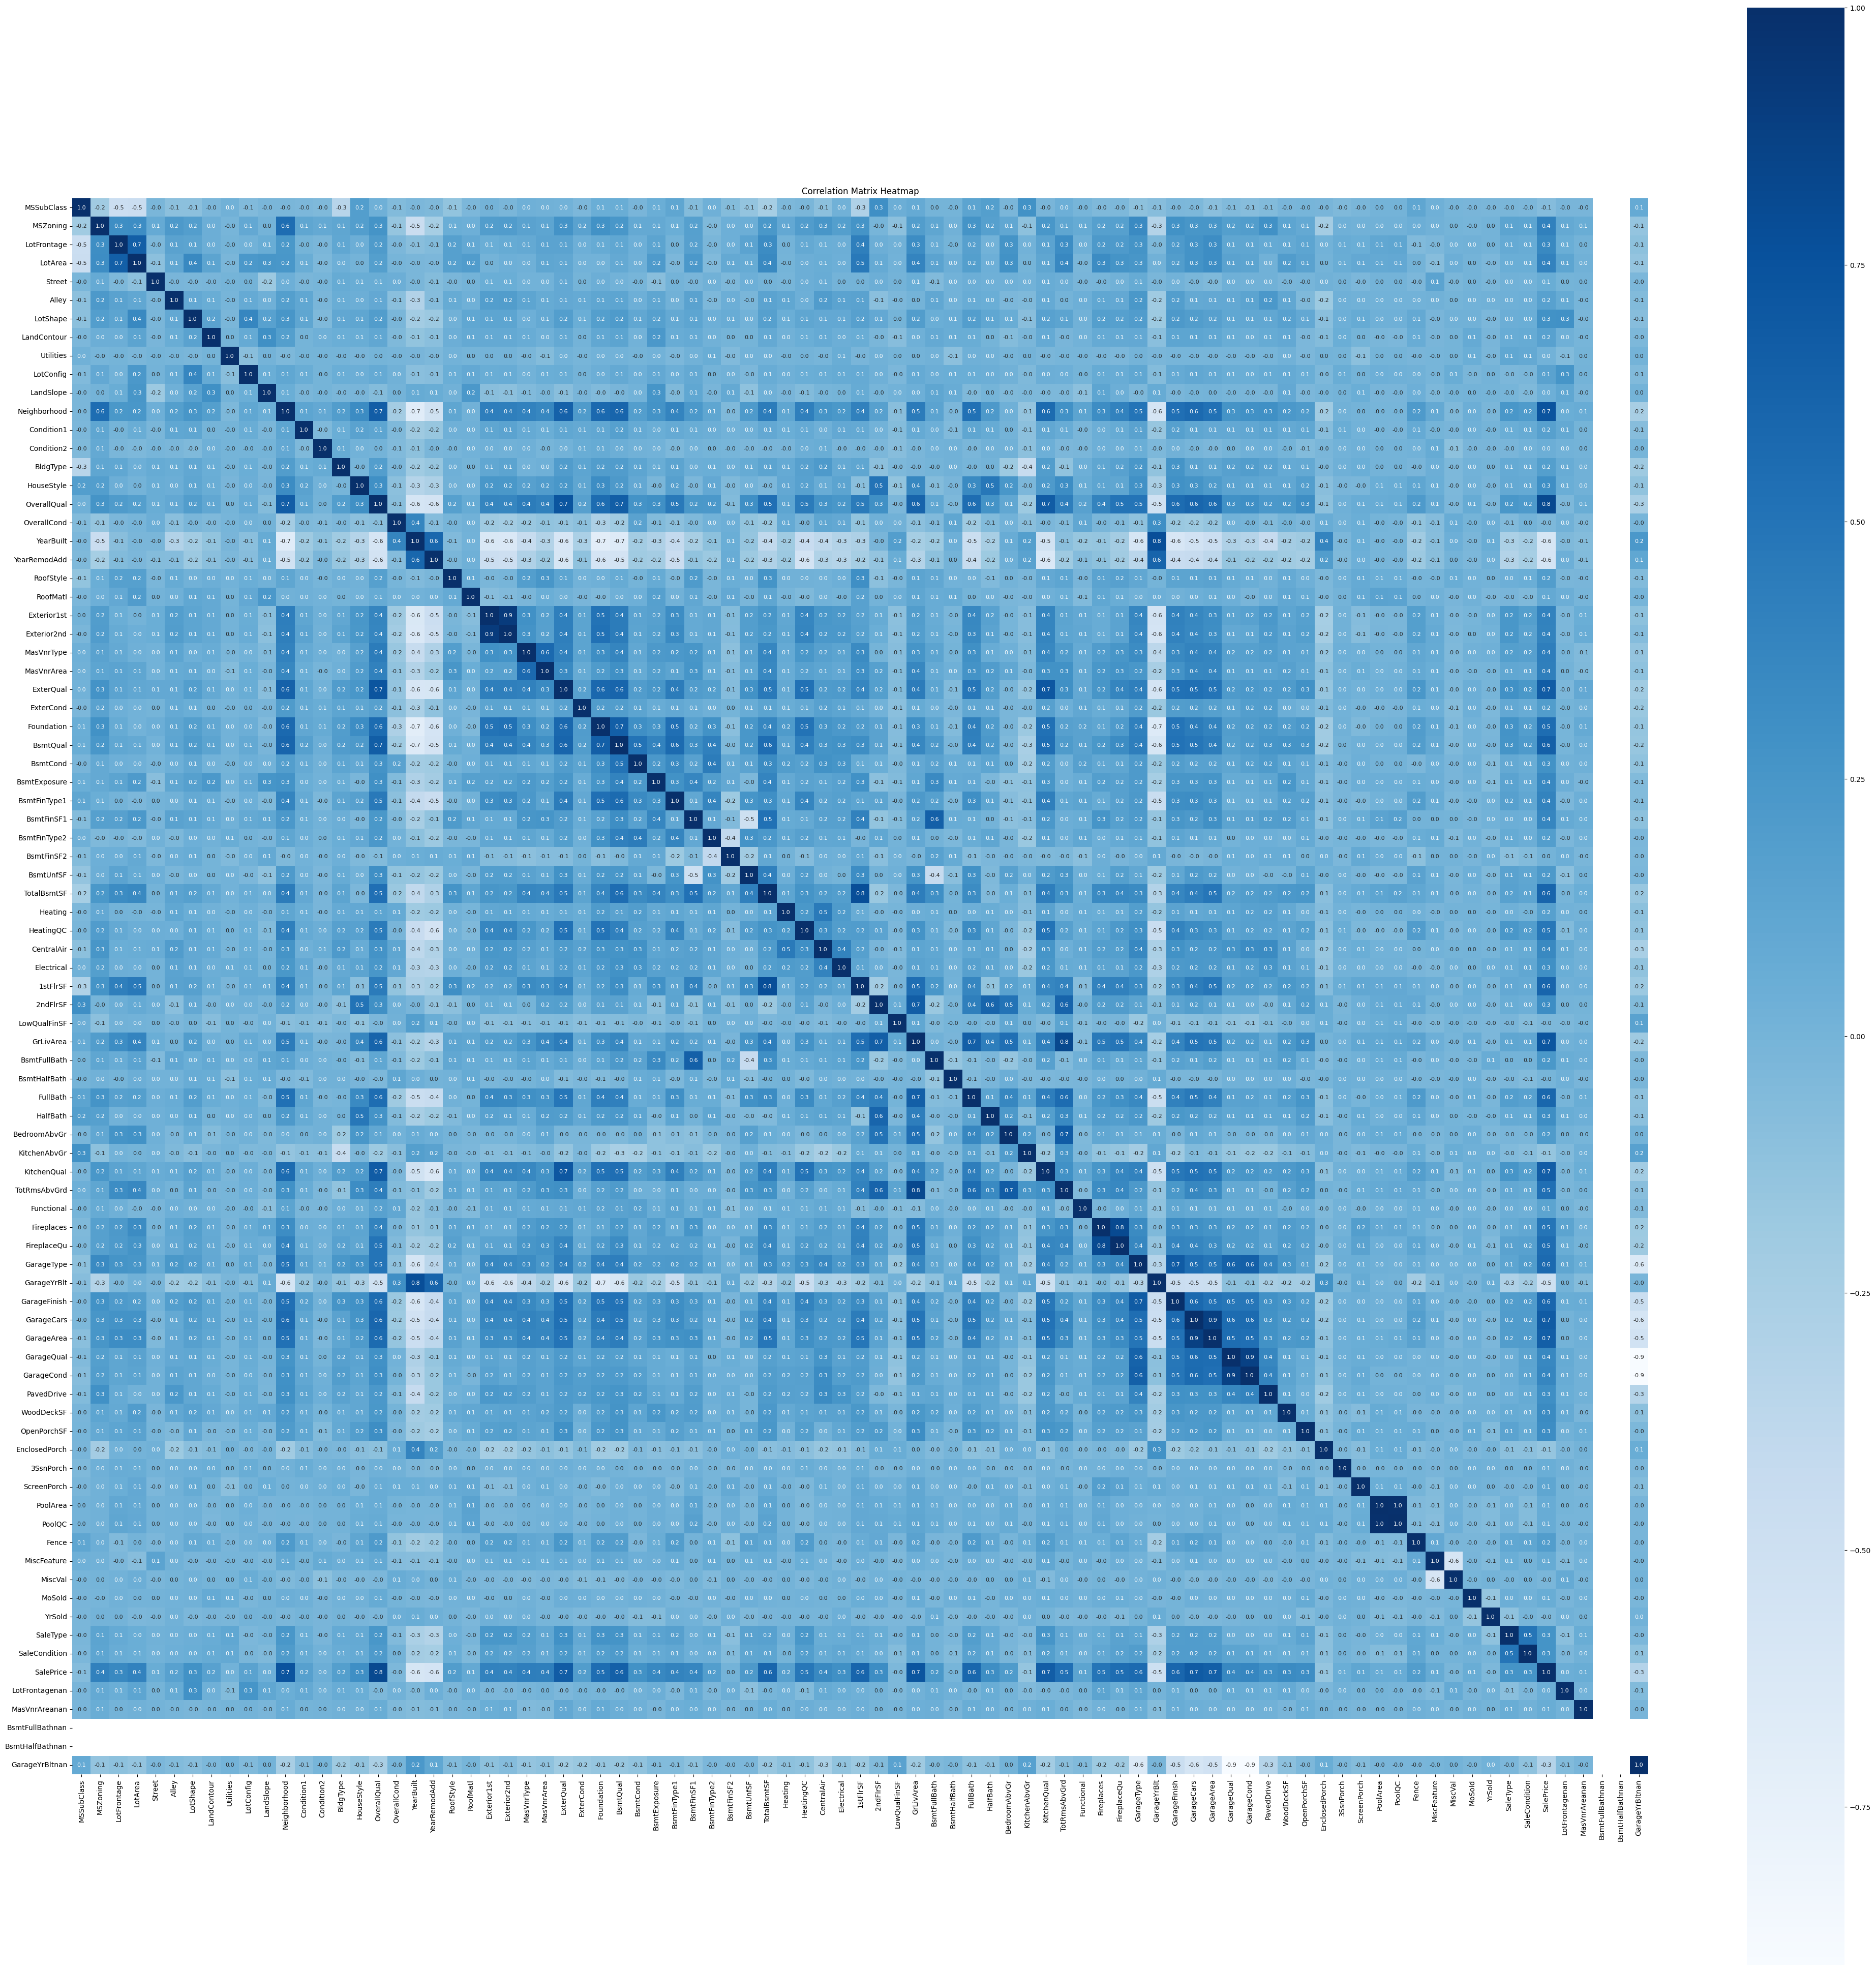

In [26]:
# Compute the correlation matrix
correlation_matrix = train_data.corr()

# Plot the heatmap
plt.figure(figsize=(50,50))
sns.heatmap(correlation_matrix, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.title('Correlation Matrix Heatmap')
plt.show()

### important features

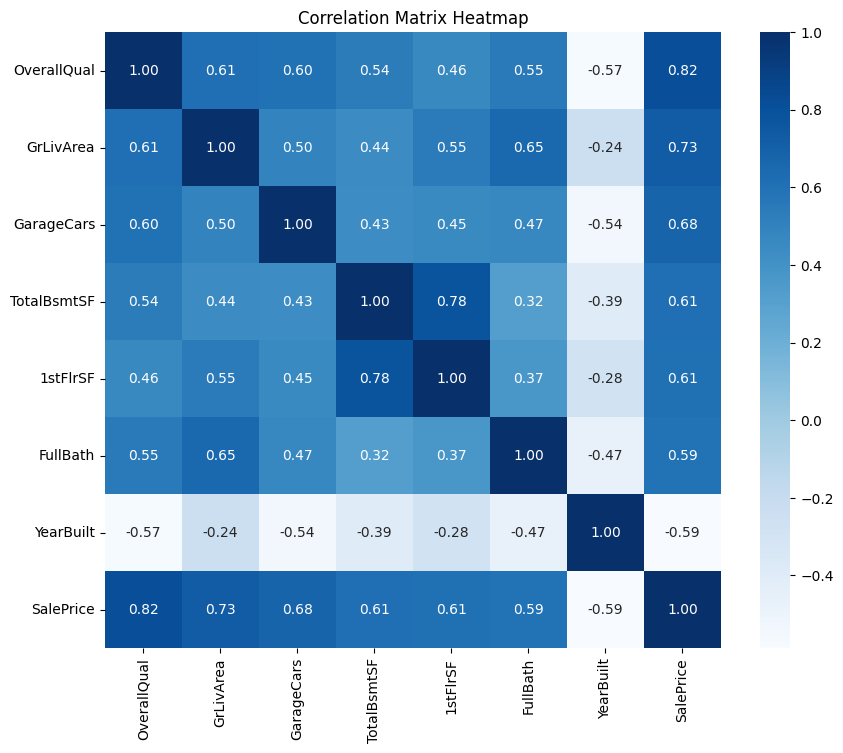

In [27]:
correlation_matrix = subset_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Blues', square=True, cbar=True,
            annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

In [28]:
x = train_data.drop(columns=['SalePrice'],axis=1)

y = train_data['SalePrice']

In [29]:
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,0,0,0,0,0
1,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,0,0,0,0,0
2,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,0,0,0,0,0
3,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,0,0,0,0,0
4,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,0,0,0,0,0


In [30]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [31]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42,shuffle=True)


In [32]:
len(X_train)
                           


1314

### Linear Regression Model

In [33]:
model = LinearRegression()

In [34]:
model.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred=model.predict(X_test)
model.score(X_test,y_test)

0.9373464514992946

In [36]:
acc_r2_score = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

In [37]:
print(acc_r2_score)
print(mae)
print(mse)
print(model.score(X_test,y_test))

0.9373464514992946
0.081878854046258
0.012278350448544119
0.9373464514992946


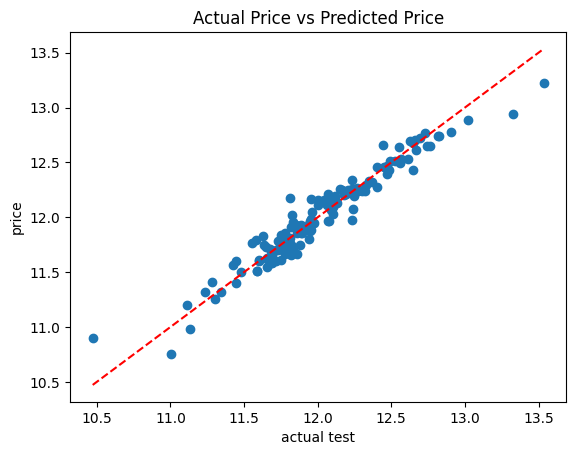

In [38]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual test')
plt.ylabel('price')
plt.title("Actual Price vs Predicted Price")
min_x = min(min(y_pred), min(y_test))
max_x = max(max(y_pred), max(y_test))
plt.plot([min_x,max_x], [min_x,max_x], 'r--', label = '1:1')

plt.show()

### Lasso Regression

In [39]:
lasso=Lasso()
lasso.fit(X_train,  y_train)
lass_y_predict = lasso.predict(X_test)

In [40]:
lass_r2_score=r2_score(y_test,lass_y_predict)
lass_mae=mean_absolute_error(y_test,lass_y_predict)
lass_mse=mean_squared_error(y_test,lass_y_predict)

print(lass_r2_score)
print(lass_mae)
print(lass_mse)
print(lasso.score(X_test,y_test))

0.8026951524913735
0.12717479775680934
0.038666254679576524
0.8026951524913735


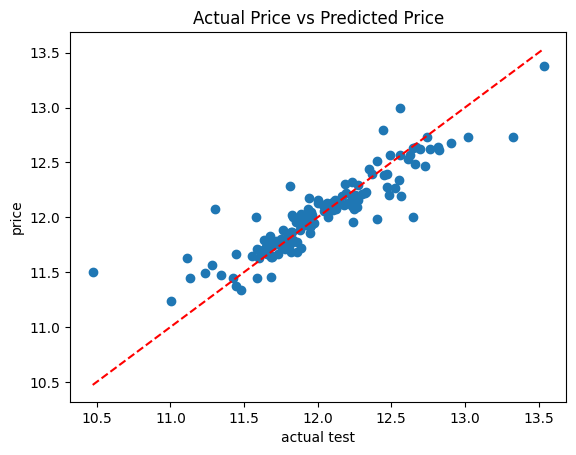

In [41]:
plt.scatter(y_test,lass_y_predict)
plt.xlabel('actual test')
plt.ylabel('price')
plt.title("Actual Price vs Predicted Price")
min_x = min(min(lass_y_predict), min(y_test))
max_x = max(max(lass_y_predict), max(y_test))
plt.plot([min_x,max_x], [min_x,max_x], 'r--', label = '1:1')

plt.show()

### Ridge Regression

In [42]:
ridge = Ridge()
ridge.fit(X_train,  y_train)
ridge_y_predict = lasso.predict(X_test)

In [43]:
ridge_r2_score=r2_score(y_test,ridge_y_predict)
ridge_mae=mean_absolute_error(y_test,ridge_y_predict)
ridge_mse=mean_squared_error(y_test,ridge_y_predict)

print(ridge_r2_score)
print(ridge_mae)
print(ridge_mse)
print(ridge.score(X_test,y_test))

0.8026951524913735
0.12717479775680934
0.038666254679576524
0.9355463074979351


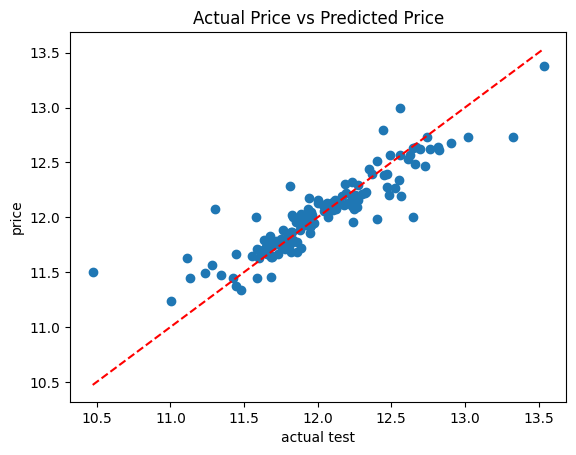

In [44]:
plt.scatter(y_test,ridge_y_predict)
plt.xlabel('actual test')
plt.ylabel('price')
plt.title("Actual Price vs Predicted Price")
min_x = min(min(ridge_y_predict), min(y_test))
max_x = max(max(ridge_y_predict), max(y_test))
plt.plot([min_x,max_x], [min_x,max_x], 'r--', label = '1:1')
plt.show()

In [45]:
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr = svr.fit(X_train, y_train)

In [46]:
svr_y_pred = svr.predict(X_test)

In [47]:
svr_r2_score=r2_score(y_test,svr_y_pred)
svr_mae=mean_absolute_error(y_test,svr_y_pred)
svr_mse=mean_squared_error(y_test,svr_y_pred)

print(svr_r2_score)
print(svr_mae)
print(svr_mse)
print(svr.score(X_test,y_test))

0.823569346875455
0.12160997707179584
0.034575493978673856
0.823569346875455


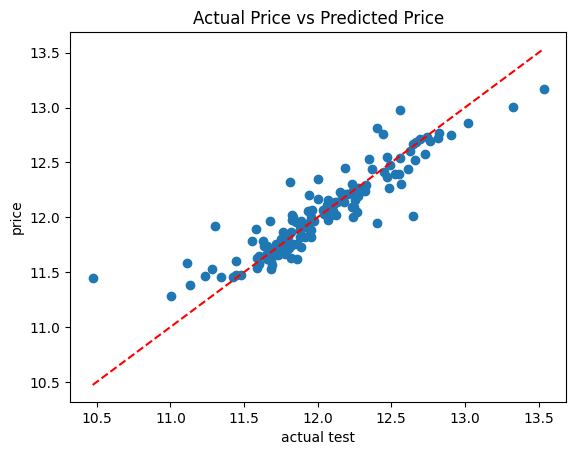

In [48]:
plt.scatter(y_test,svr_y_pred)
plt.xlabel('actual test')
plt.ylabel('price')
plt.title("Actual Price vs Predicted Price")
min_x = min(min(svr_y_pred), min(y_test))
max_x = max(max(svr_y_pred), max(y_test))
plt.plot([min_x,max_x], [min_x,max_x], 'r--', label = '1:1')
plt.show()

### Pickle To Save model for deployment

In [49]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)